In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



%matplotlib notebook

In [2]:
from hcga.graphs import Graphs

graph_obj = Graphs()

graph_obj.load_feature_set()


In [3]:
graph_obj.normalise_feature_data()

/home/robert/anaconda3/lib/python3.6/site-packages/hcga/graphs.py:232: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X=graph_feature_matrix.as_matrix()
/home/robert/anaconda3/lib/python3.6/site-packages/hcga/graphs.py:234: RuntimeWarning: invalid value encountered in true_divide
  X_N = X / X.max(axis=0)


In [6]:
graph_obj.top_features_model()

/home/robert/anaconda3/lib/python3.6/site-packages/hcga/graphs.py:232: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X=graph_feature_matrix.as_matrix()
/home/robert/anaconda3/lib/python3.6/site-packages/hcga/graphs.py:234: RuntimeWarning: invalid value encountered in true_divide
  X_N = X / X.max(axis=0)


In [7]:
graph_obj.top_features_list


['BS_num_edges',
 'CL_num_triangles',
 'DC_mean',
 'BC_mean',
 'SC_mean',
 'SC_max',
 'SC_estrada_index',
 'CC_mean',
 'HC_mean',
 'MC_mod',
 'NC_mean',
 'NC_node_connectivity',
 'NC_edge_connectivity',
 'NC_wiener_index',
 'SH_constraint_mean',
 'SH_effective_size_opt_model',
 'SW_sigma',
 'FC_powerlaw_SSE_10',
 'CB_node_ratio',
 'CB_coverage',
 'CB_performance',
 'CA_performance_2',
 'CA_performance_3',
 'CA_performance_4',
 'CA_most_dense_6',
 'CA_performance_6',
 'CA_coverage_7',
 'CA_performance_7',
 'CA_performance_8',
 'CLP_inter_comm_edge',
 'CLP_inter_comm_nedge',
 'CY_shortest_cycle',
 'ND_std',
 'ND_min',
 'ND_powerlaw_SSE_10',
 'ND_powerlaw_SSE_20',
 'Ecc_powerlaw_SSE_50',
 'kC_largest_max_k_component',
 'SOC_min',
 'CA_most_dense_2',
 'CA_most_dense_4',
 'CA_most_dense_5',
 'CA_performance_5',
 'CA_most_dense_7',
 'CA_least_dense_7',
 'CA_most_dense_8',
 'CA_coverage_9',
 'ND_mean',
 'CA_coverage_2',
 'SC_std',
 'DC_max',
 'CC_max',
 'HC_max',
 'NC_std',
 'CA_most_dense_3'

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
                    

X=graph_obj.X_N
y=graph_obj.y
feature_names=[col for col in graph_obj.graph_feature_matrix.columns]

top_features_list=[]
            
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    clf=RandomForestClassifier(n_estimators=10000, random_state=0)
    clf.fit(X_train, y_train)

    sfm = SelectFromModel(clf, threshold=0.01)
    sfm.fit(X_train, y_train)

    for feature_list_index in sfm.get_support(indices=True):
        top_features_list.append(feature_names[feature_list_index])


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score               

seed = 7

scoring = 'balanced_accuracy'

X=graph_obj.X_N
y=graph_obj.y
feature_names=[col for col in graph_obj.graph_feature_matrix.columns]

accuracy = []        
for i in range(0,X.shape[1]):
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(LinearSVC(), X[:,i].reshape(-1,1), y, cv=kfold, scoring=scoring)
    accuracy.append(cv_results.mean())

top_feat_ids = np.flip(np.argsort(accuracy))
top_feat_acc = np.flip(np.sort(accuracy))
top_feats_names = [feature_names[i] for i in top_feat_ids]





/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

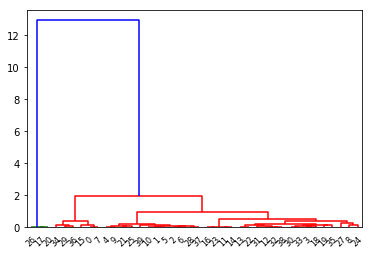

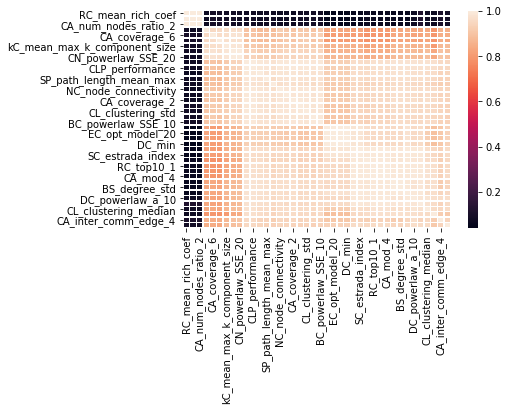

In [126]:
import seaborn as sns



top_feats_names[:40]
#top_feat_ids[:40]
df_top40 = pd.DataFrame(columns = top_feats_names[:40], data=X[:,top_feat_ids[:40]])




cor = np.abs(df_top40.corr())

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(cor, 'ward')

dn = dendrogram(Z)
#dn['ivl']



new_index = [int(i) for  i in dn['ivl']]
top_feats_names = [top_feats_names[i] for i in new_index]


df = df_top40[top_feats_names]
cor2 = np.abs(df.corr())

plt.figure()
ax = sns.heatmap(cor2, linewidth=0.5)
plt.show()

In [105]:
reorder_ind

TypeError: list indices must be integers or slices, not str